In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [12]:
# Replace this broken code:
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-17')

# With this working solution:
import yfinance as yf

# Download the data and flatten the column structure
df = yf.download('AAPL', start='2012-01-01', end='2020-12-17')

# Check if columns are multi-level and flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Show the data
df

C:\Users\Arnav\AppData\Local\Temp\ipykernel_26220\4018487554.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2020-12-17')
[*********************100%***********************]  1 of 1 completed



Price,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,12.345175,12.383301,12.278230,12.290239,302220800
2012-01-04,12.411516,12.448742,12.286633,12.308247,260022000
2012-01-05,12.549310,12.564920,12.388401,12.456848,271269600
2012-01-06,12.680497,12.691004,12.585033,12.601544,318292800
2012-01-09,12.660382,12.841103,12.648974,12.773559,394024400
...,...,...,...,...,...
2020-12-10,120.084541,120.698415,117.073662,117.414699,81312200
2020-12-11,119.275803,119.616840,117.463426,119.295287,86939800
2020-12-14,118.661957,120.191758,118.428104,119.460961,79184500


In [4]:
#Get the number or rows and columns in the data set
df.shape

(2255, 5)

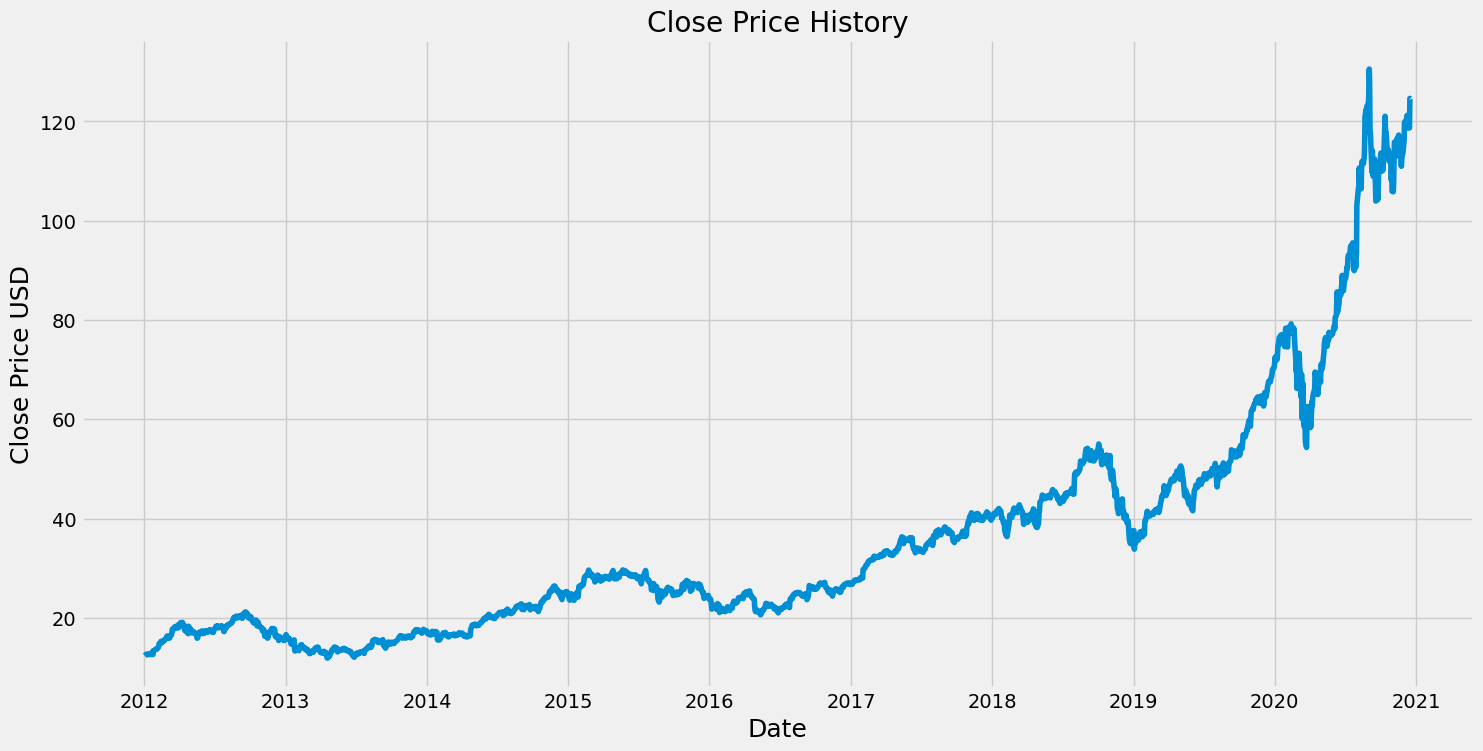

In [5]:
#visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [13]:
# Create a new datafram with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1804

In [14]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00377981],
       [0.00433908],
       [0.00550069],
       ...,
       [0.90004158],
       [0.95014839],
       [0.9495734 ]])

In [21]:
# create the training dataset
# create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Past 60 days
    y_train.append(train_data[i, 0])       # Next day's price
    if i<=61:
        print(x_train)
        print(y_train)
        print()



[array([0.00377981, 0.00433908, 0.00550069, 0.00660662, 0.00643705,
       0.00681918, 0.00664456, 0.00635102, 0.00595114, 0.00718869,
       0.00830476, 0.00796055, 0.00607515, 0.00787452, 0.00610299,
       0.01274615, 0.01223242, 0.01290305, 0.01435315, 0.01523131,
       0.01515794, 0.01488718, 0.0160412 , 0.01712685, 0.01835677,
       0.02034337, 0.02451661, 0.02457986, 0.02690307, 0.02863923,
       0.02565544, 0.02680434, 0.02678161, 0.03000322, 0.02954513,
       0.03039292, 0.03191642, 0.03276421, 0.03520634, 0.03698545,
       0.03749921, 0.03767886, 0.03463696, 0.033903  , 0.03401187,
       0.03687162, 0.03767639, 0.0394049 , 0.04347932, 0.04891533,
       0.04789792, 0.04790049, 0.05183064, 0.05306071, 0.05218502,
       0.05138529, 0.05055273, 0.05331878, 0.05521684, 0.05601149])]
[0.05404763173674944]

[array([0.00377981, 0.00433908, 0.00550069, 0.00660662, 0.00643705,
       0.00681918, 0.00664456, 0.00635102, 0.00595114, 0.00718869,
       0.00830476, 0.00796055, 0.00

In [23]:
# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (1744, 60, 1)
y_train shape: (1744,)


In [25]:
# Build the LSTM model
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Explicit input layer
model.add(LSTM(50, return_sequences=True))     # No input_shape needed
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# train the model